In [1]:
# import necessary modules
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [ ]:
import sys
sys.executable

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [3]:
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'reio_parametrization':'reio_inter',
                   'reio_inter_num':8,
                   'reio_inter_z':'0,  3,  4,   8,   9,  10,  11, 12',
                   'reio_inter_xe':'-2, -2, -1,  -1, 0.9, 0.5, 0.1,  0',
                   'thermodynamics_verbose':1
                   }  
##############
#    
# call CLASS
#
###############
M = Class()
M.set(common_settings)
M.compute()
derived = M.get_current_derived_parameters(['tau_rec','conformal_age'])
thermo = M.get_thermodynamics()
thermo.items()

dict_items([('z', array([0.00000000e+00, 5.89662257e-03, 1.92189842e-02, ...,
       9.99850000e+03, 9.99900000e+03, 9.99950000e+03])), ('conf. time [Mpc]', array([14165.04541244, 14138.91492993, 14080.14351256, ...,
          42.96235305,    42.96035128,    42.9583497 ])), ('x_e', array([1.16430062, 1.16430062, 1.16430062, ..., 1.16430062, 1.16430062,
       1.16430062])), ("kappa' [Mpc^-1]", array([4.45609068e-07, 4.50879739e-07, 4.62901970e-07, ...,
       4.45564508e+01, 4.45609068e+01, 4.45653630e+01])), ('exp(-kappa)', array([1.        , 0.99998829, 0.99996143, ..., 0.        , 0.        ,
       0.        ])), ('g [Mpc^-1]', array([4.45609068e-07, 4.50874458e-07, 4.62884118e-07, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])), ('Tb [K]', array([4.07855070e-01, 4.12602987e-01, 4.23461977e-01, ...,
       2.72536372e+04, 2.72550000e+04, 2.72563627e+04])), ('c_b^2', array([1.05387615e-13, 1.07204799e-13, 1.10002791e-13, ...,
       5.64974428e-09, 5.65002678e-09, 5.65

<IPython.core.display.Javascript object>


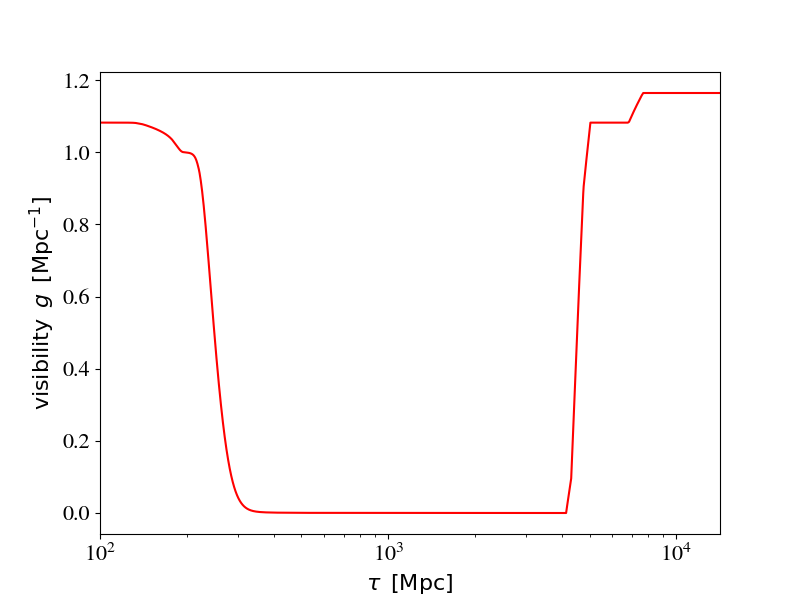

In [4]:
tau = thermo['conf. time [Mpc]']
xe = thermo['x_e']
# to make the reionisation peak visible, rescale g by 100 for late times
#g[:500] *= 100
#################
#
# start plotting
#
#################
#    
plt.xlim([1.e2,derived['conformal_age']])
plt.xlabel(r'$\tau \,\,\, \mathrm{[Mpc]}$')
plt.ylabel(r'$\mathrm{visibility} \,\,\, g \,\,\, [\mathrm{Mpc}^{-1}]$')
#plt.axvline(x=derived['tau_rec'],color='k')
# The conformal time at reionisation  could be extracted from the code.
# But we know it because it is part of the standard output
# when thermodynamics_verbose=1
#plt.axvline(x=4255.316282,color='k')
#
# Print functions one by one, saving between each (for slides)
#
plt.semilogx(tau,xe,'r',label=r'$\psi$')
plt.show()

In [5]:
plt.savefig('thermo.pdf',bbox_inches='tight')